In [ ]:
# Notebook composed by Walter Piper (walter.piper7@gmail.com)
# Purpose: Working on BCI with Muse headband. 
# The code for streaming raw data is adapted from borrowed code, as indicated in the individual cells.

In [2]:
#!poetry add "python-osc>=1.7.3"


Updating dependencies
Resolving dependencies...

Writing lock file

Package operations: 1 install, 0 updates, 0 removals

  • Installing python-osc (1.7.6)


In [ ]:
# a toy example to demostrate how to 
# interact with Muse Headband in Python.
# author: josephpan m[AT]hahack.com
# 2019-11-21

import struct
import socket
import time
import random
import subprocess
import argparse

from pythonosc import dispatcher
from pythonosc import osc_server
from pythonosc import udp_client

def eeg_handler(address, eeg, tp9, af7, af8,tp10, fpz):
	client.send_message("/muse/eeg/tp9",tp9)
	client.send_message("/muse/eeg/af7",af7)
	client.send_message("/muse/eeg/af8",af8)
	client.send_message("/muse/eeg/tp10",tp10)
	client.send_message("/muse/eeg/fpz",fpz)
    
def alpha_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    Handler for alpha absolute value.
    Can be One Average or Four Float values.
    If you set the OSC Stream Brainwaves to `All values` 
    at Muse Monitor, you should change the param to: 
    def alpha_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    print("__alpha value: {}".format((ch1, ch2, ch3, ch4)))
    print('\n')


def beta_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    Handler for beta absolute value.
    Can be One Average or Four Float values.
    If you set the OSC Stream Brainwaves to `All values` 
    at Muse Monitor, you should change the param to: 
    def beta_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    print("__beta value: {}".format((ch1, ch2, ch3, ch4)))
    print('\n')


def delta_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    Handler for delta absolute value.
    Can be One Average or Four Float values.
    If you set the OSC Stream Brainwaves to `All values` 
    at Muse Monitor, you should change the param to: 
    def delta_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    print("__delta value: {}".format((ch1, ch2, ch3, ch4)))


def theta_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    Handler for theta absolute value.
    Can be One Average or Four Float values.
    If you set the OSC Stream Brainwaves to `All values` 
    at Muse Monitor, you should change the param to: 
    def theta_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    print("__theta value: {}".format((ch1, ch2, ch3, ch4)))
    print('\n')


def gamma_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    Handler for gamma absolute value.
    Can be One Average or Four Float values.
    If you set the OSC Stream Brainwaves to `All values` 
    at Muse Monitor, you should change the param to: 
    def gamma_handler(unused_addr, args, ch1, ch2, ch3, ch4):
    """
    print("__gamma value: {}".format((ch1, ch2, ch3, ch4)))
    print('\n')


def mellow_handler(unused_addr, args, value):
    print("__mellow value: {}".format(value))
    return


def concen_handler(unused_addr, args, value):
    print("__concentration value: {}".format(value))   
    print('\n')
    return


def blink_handler(unused_addr, args, blink):
    if blink:
        print("__blink")
        print('\n')


def jaw_clench_handler(unused_addr, args, jaw):
    if jaw:
        print("__Jaw_Clench")
        print('\n')

In [ ]:
dispatcher = dispatcher.Dispatcher()
dispatcher.map("/muse/elements/alpha_absolute", alpha_handler, "EEG")
dispatcher.map("/muse/elements/beta_absolute", beta_handler, "EEG")
dispatcher.map("/muse/elements/delta_absolute", delta_handler, "EEG")
dispatcher.map("/muse/elements/theta_absolute", theta_handler, "EEG")
dispatcher.map("/muse/elements/gamma_absolute", gamma_handler, "EEG")
dispatcher.map("/muse/elements/blink", blink_handler, "EEG")
dispatcher.map("/muse/elements/jaw_clench", jaw_clench_handler, "EEG")
dispatcher.map("/muse/algorithm/concentration", concen_handler, "EEG")   

In [ ]:
# instead of 192.168.1.10
server = osc_server.ThreadingOSCUDPServer(
    ("192.168.1.165", 5000), dispatcher)
print("Serving on {}".format(server.server_address))
server.serve_forever()

# Barebones implementation of basic (raw) data stream

In [10]:
datetime?

Init signature: datetime(self, /, *args, **kwargs)
Docstring:     
datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

The year, month and day arguments are required. tzinfo may be None, or an
instance of a tzinfo subclass. The remaining arguments may be ints.
File:           c:\python39\lib\datetime.py
Type:           type
Subclasses:     datetime


In [1]:
"""
Mind Monitor - Minimal EEG OSC Receiver
Coded: James Clutterbuck (2021)
Requires: pip install python-osc
### Code adapted by Walter Piper (2021)
"""
from datetime import datetime
from pythonosc import dispatcher
from pythonosc import osc_server

ip = "192.168.1.165"
port = 5000

EEG_log_list = []

def eeg_handler(address: str,*args):
    dateTimeObj = datetime.now()
    printStr = dateTimeObj.strftime("%Y-%m-%d %H:%M:%S.%f")
    for arg in args:
        printStr += ","+str(arg)
    print(printStr)
    EEG_log_list.append(printStr)
    print('EEG LOG LIST NOW HAS LENGTH', len(EEG_log_list))
    
if __name__ == "__main__":
    dispatcher = dispatcher.Dispatcher()
    dispatcher.map("/muse/eeg", eeg_handler)

    server = osc_server.ThreadingOSCUDPServer((ip, port), dispatcher)
    print("Listening on UDP port "+str(port))
    server.serve_forever()

Listening on UDP port 5000
2021-05-26 12:02:08.062513,848.5714111328125,807.87548828125,793.7728881835938,799.8168334960938,923.51647949218752021-05-26 12:02:08.065515,859.047607421875,810.6959838867188,798.6080322265625,819.1575317382812,877.98535156252021-05-26 12:02:08.068515,769.5970458984375,799.8168334960938,799.010986328125,823.99267578125,824.7985229492188
EEG LOG LIST NOW HAS LENGTH 1
2021-05-26 12:02:08.071514,750.2564086914062,793.7728881835938,784.5054931640625,808.2783813476562,775.23809814453122021-05-26 12:02:08.074514,830.8424682617188,802.2344360351562,788.1318969726562,796.1904907226562,843.3333129882812

2021-05-26 12:02:08.077514,803.8461303710938,803.8461303710938,777.6557006835938,795.3846435546875,817.948730468752021-05-26 12:02:08.080518,738.974365234375,802.2344360351562,789.7435913085938,809.4871826171875,875.56774902343752021-05-26 12:02:08.083516,830.8424682617188,809.084228515625,794.1758422851562,809.4871826171875,860.25640869140622021-05-26 12:02:08.08651

----------------------------------------Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook----------------------------------------Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook----------------------------------------Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook----------------------------------------Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook----------------------------------------Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook----------------------------------------Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ign

KeyboardInterrupt: 

In [ ]:
.059829
.075456
.106704


In [4]:
.106704 - .075456

0.031247999999999998

In [5]:
.075456 - .059829

0.015626999999999995

In [7]:
print(0.015627/7, 'seconds per data point')
print('would be {} Hz'.format(1/(0.015627/7)))

0.0022324285714285714 seconds per data point
would be 447.9426633390926 Hz


In [9]:
print(0.031248/8, 'seconds per data point')
print('would be {} Hz'.format(1/(0.031248/8)))

0.003906 seconds per data point
would be 256.0163850486431 Hz


In [14]:
import numpy as np
def calculate_sampling_rate(time_seconds, n_data_points, print_from_function=False):
    """Calculate sampling frequency of transmitted data"""
    fs = np.round(1/(time_seconds/n_data_points), 6)
    if print_from_function == True:
        print('Transmitted data at {} Hz'.format(fs))
    return fs

In [15]:
calculate_sampling_rate(.01563, 7, print_from_function=True)

Transmitted data at 447.856686 Hz


447.856686

In [16]:
calculate_sampling_rate(.031248, 8, print_from_function=True)

Transmitted data at 256.016385 Hz


256.016385

In [18]:
import re

sample_string = """Listening on UDP port 5000
2021-05-26 00:13:26.059829,817.5457763671875,795.7875366210938,805.4578857421875,751.4652099609375,748.24176025390622021-05-26 00:13:26.059829,788.1318969726562,801.025634765625,808.6813354492188,756.3003540039062,761.13555908203122021-05-26 00:13:26.059829,857.8388061523438,810.2930297851562,804.2490844726562,756.3003540039062,815.934082031252021-05-26 00:13:26.059829,817.1428833007812,796.5933837890625,800.6226806640625,753.076904296875,811.0988769531252021-05-26 00:13:26.059829,801.025634765625,807.069580078125,808.6813354492188,750.6593627929688,795.38464355468752021-05-26 00:13:26.075456,837.2893676757812,802.6373901367188,807.4725341796875,764.3589477539062,766.77655029296882021-05-26 00:13:26.075456,819.96337890625,800.6226806640625,807.87548828125,749.8534545898438,880.40295410156252021-05-26 00:13:26.075456,784.908447265625,802.2344360351562,799.8168334960938,746.2271118164062,724.46887207031252021-05-26 00:13:26.075456,770.4029541015625,799.010986328125,806.2637329101562,745.018310546875,827.6190185546875
2021-05-26 00:13:26.075456,774.8351440429688,797.8021850585938,805.4578857421875,745.8241577148438,727.2893676757812

2021-05-26 00:13:26.075456,814.7252807617188,806.2637329101562,804.2490844726562,750.2564086914062,678.1318969726562

2021-05-26 00:13:26.075456,864.6886596679688,805.8607788085938,804.2490844726562,761.5384521484375,787.3259887695312
"""

re.split("\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{6},", sample_string)



['Listening on UDP port 5000\n',
 '817.5457763671875,795.7875366210938,805.4578857421875,751.4652099609375,748.2417602539062',
 '788.1318969726562,801.025634765625,808.6813354492188,756.3003540039062,761.1355590820312',
 '857.8388061523438,810.2930297851562,804.2490844726562,756.3003540039062,815.93408203125',
 '817.1428833007812,796.5933837890625,800.6226806640625,753.076904296875,811.098876953125',
 '801.025634765625,807.069580078125,808.6813354492188,750.6593627929688,795.3846435546875',
 '837.2893676757812,802.6373901367188,807.4725341796875,764.3589477539062,766.7765502929688',
 '819.96337890625,800.6226806640625,807.87548828125,749.8534545898438,880.4029541015625',
 '784.908447265625,802.2344360351562,799.8168334960938,746.2271118164062,724.4688720703125',
 '770.4029541015625,799.010986328125,806.2637329101562,745.018310546875,827.6190185546875\n',
 '774.8351440429688,797.8021850585938,805.4578857421875,745.8241577148438,727.2893676757812\n\n',
 '814.7252807617188,806.26373291015

In [65]:
test_list = re.split("\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{6},", test_string)
print(len(test_list))

6658


In [64]:
import re
re.split?

Signature: re.split(pattern, string, maxsplit=0, flags=0)
Docstring:
Split the source string by the occurrences of the pattern,
returning a list containing the resulting substrings.  If
capturing parentheses are used in pattern, then the text of all
groups in the pattern are also returned as part of the resulting
list.  If maxsplit is nonzero, at most maxsplit splits occur,
and the remainder of the string is returned as the final element
of the list.
File:      c:\python39\lib\re.py
Type:      function


In [26]:
sample_string2 = """
Listening on UDP port 5000
2021-05-26 00:13:26.059829,817.5457763671875,795.7875366210938,805.4578857421875,751.4652099609375,748.24176025390622021-05-26 00:13:26.059829,788.1318969726562,801.025634765625,808.6813354492188,756.3003540039062,761.13555908203122021-05-26 00:13:26.059829,857.8388061523438,810.2930297851562,804.2490844726562,756.3003540039062,815.934082031252021-05-26 00:13:26.059829,817.1428833007812,796.5933837890625,800.6226806640625,753.076904296875,811.0988769531252021-05-26 00:13:26.059829,801.025634765625,807.069580078125,808.6813354492188,750.6593627929688,795.38464355468752021-05-26 00:13:26.075456,837.2893676757812,802.6373901367188,807.4725341796875,764.3589477539062,766.77655029296882021-05-26 00:13:26.075456,819.96337890625,800.6226806640625,807.87548828125,749.8534545898438,880.40295410156252021-05-26 00:13:26.075456,784.908447265625,802.2344360351562,799.8168334960938,746.2271118164062,724.46887207031252021-05-26 00:13:26.075456,770.4029541015625,799.010986328125,806.2637329101562,745.018310546875,827.6190185546875
2021-05-26 00:13:26.075456,774.8351440429688,797.8021850585938,805.4578857421875,745.8241577148438,727.2893676757812

2021-05-26 00:13:26.075456,814.7252807617188,806.2637329101562,804.2490844726562,750.2564086914062,678.1318969726562

2021-05-26 00:13:26.075456,864.6886596679688,805.8607788085938,804.2490844726562,761.5384521484375,787.3259887695312






2021-05-26 00:13:26.106704,764.3589477539062,799.4139404296875,809.4871826171875,766.3735961914062,785.31134033203122021-05-26 00:13:26.106704,755.4945068359375,801.4285888671875,806.6666870117188,767.9853515625,785.31134033203122021-05-26 00:13:26.106704,788.1318969726562,810.6959838867188,811.098876953125,762.7472534179688,739.37731933593752021-05-26 00:13:26.106704,848.1685180664062,811.098876953125,812.7106323242188,767.9853515625,819.963378906252021-05-26 00:13:26.106704,815.1282348632812,811.90478515625,807.4725341796875,766.7765502929688,776.44689941406252021-05-26 00:13:26.106704,812.7106323242188,808.2783813476562,811.5018310546875,764.7619018554688,811.904785156252021-05-26 00:13:26.106704,817.5457763671875,805.054931640625,807.4725341796875,765.5677490234375,783.29669189453122021-05-26 00:13:26.106704,838.09521484375,809.084228515625,805.054931640625,764.7619018554688,820.7692260742188

2021-05-26 00:13:26.122327,855.4212646484375,805.8607788085938,807.069580078125,765.1648559570312,892.893798828125

2021-05-26 00:13:26.122327,780.0732421875,803.8461303710938,811.098876953125,760.3296508789062,846.5567626953125

2021-05-26 00:13:26.122327,815.5311279296875,806.2637329101562,814.3223266601562,764.7619018554688,862.27105712890622021-05-26 00:13:26.122327,815.5311279296875,807.069580078125,809.084228515625,759.9267578125,892.4908447265625
"""

split_list2 = re.split("\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{6},", sample_string2)
[item.split('\n')[0] for item in split_list2]



['',
 '817.5457763671875,795.7875366210938,805.4578857421875,751.4652099609375,748.2417602539062',
 '788.1318969726562,801.025634765625,808.6813354492188,756.3003540039062,761.1355590820312',
 '857.8388061523438,810.2930297851562,804.2490844726562,756.3003540039062,815.93408203125',
 '817.1428833007812,796.5933837890625,800.6226806640625,753.076904296875,811.098876953125',
 '801.025634765625,807.069580078125,808.6813354492188,750.6593627929688,795.3846435546875',
 '837.2893676757812,802.6373901367188,807.4725341796875,764.3589477539062,766.7765502929688',
 '819.96337890625,800.6226806640625,807.87548828125,749.8534545898438,880.4029541015625',
 '784.908447265625,802.2344360351562,799.8168334960938,746.2271118164062,724.4688720703125',
 '770.4029541015625,799.010986328125,806.2637329101562,745.018310546875,827.6190185546875',
 '774.8351440429688,797.8021850585938,805.4578857421875,745.8241577148438,727.2893676757812',
 '814.7252807617188,806.2637329101562,804.2490844726562,750.256408691

In [37]:
values_array = np.vstack([np.array([float(val) for val in timepoint.split(',') if len(val)>0]) for timepoint in [item.split('\n')[0] for item in split_list2] if len(timepoint)>0])
print(values_array)
print(type(values_array))
print(values_array.shape)

[[817.54577637 795.78753662 805.45788574 751.46520996 748.24176025]
 [788.13189697 801.02563477 808.68133545 756.300354   761.13555908]
 [857.83880615 810.29302979 804.24908447 756.300354   815.93408203]
 [817.1428833  796.59338379 800.62268066 753.0769043  811.09887695]
 [801.02563477 807.06958008 808.68133545 750.65936279 795.38464355]
 [837.28936768 802.63739014 807.47253418 764.35894775 766.77655029]
 [819.96337891 800.62268066 807.87548828 749.85345459 880.4029541 ]
 [784.90844727 802.23443604 799.8168335  746.22711182 724.46887207]
 [770.4029541  799.01098633 806.26373291 745.01831055 827.61901855]
 [774.83514404 797.80218506 805.45788574 745.82415771 727.28936768]
 [814.72528076 806.26373291 804.24908447 750.25640869 678.13189697]
 [864.68865967 805.86077881 804.24908447 761.53845215 787.32598877]
 [764.35894775 799.41394043 809.48718262 766.37359619 785.31134033]
 [755.49450684 801.42858887 806.66668701 767.98535156 785.31134033]
 [788.13189697 810.69598389 811.09887695 762.747

# I was able to split a copy of the streamed output of raw EEG values on regex-defined timestamps to isolate a numpy array with the EEG values.

Good stopping point for tonight (5/26/2021 1:30am)

Note: Measures to learn: Phase coherence and Phase lag index
https://bcisociety.org/event/eeg-analysis/

# 5/26/2021 10:31AM - Goal for today : Extract values directly from OSC and input them into numpy/scikit-learn ecosystem.

In [3]:
print(EEG_log_list[:10])

['2021-05-26 12:02:08.068515,769.5970458984375,799.8168334960938,799.010986328125,823.99267578125,824.7985229492188', '2021-05-26 12:02:08.071514,750.2564086914062,793.7728881835938,784.5054931640625,808.2783813476562,775.2380981445312', '2021-05-26 12:02:08.062513,848.5714111328125,807.87548828125,793.7728881835938,799.8168334960938,923.5164794921875', '2021-05-26 12:02:08.086514,790.1465454101562,809.4871826171875,805.054931640625,832.4542236328125,899.7435913085938', '2021-05-26 12:02:08.088515,749.047607421875,795.7875366210938,796.1904907226562,806.2637329101562,838.901123046875', '2021-05-26 12:02:08.077514,803.8461303710938,803.8461303710938,777.6557006835938,795.3846435546875,817.94873046875', '2021-05-26 12:02:08.074514,830.8424682617188,802.2344360351562,788.1318969726562,796.1904907226562,843.3333129882812', '2021-05-26 12:02:08.094516,761.5384521484375,792.1611938476562,784.908447265625,796.996337890625,824.3956298828125', '2021-05-26 12:02:08.080518,738.974365234375,802.23

In [4]:
for i in range(10):
    print(EEG_log_list[i])

2021-05-26 12:02:08.068515,769.5970458984375,799.8168334960938,799.010986328125,823.99267578125,824.7985229492188
2021-05-26 12:02:08.071514,750.2564086914062,793.7728881835938,784.5054931640625,808.2783813476562,775.2380981445312
2021-05-26 12:02:08.062513,848.5714111328125,807.87548828125,793.7728881835938,799.8168334960938,923.5164794921875
2021-05-26 12:02:08.086514,790.1465454101562,809.4871826171875,805.054931640625,832.4542236328125,899.7435913085938
2021-05-26 12:02:08.088515,749.047607421875,795.7875366210938,796.1904907226562,806.2637329101562,838.901123046875
2021-05-26 12:02:08.077514,803.8461303710938,803.8461303710938,777.6557006835938,795.3846435546875,817.94873046875
2021-05-26 12:02:08.074514,830.8424682617188,802.2344360351562,788.1318969726562,796.1904907226562,843.3333129882812
2021-05-26 12:02:08.094516,761.5384521484375,792.1611938476562,784.908447265625,796.996337890625,824.3956298828125
2021-05-26 12:02:08.080518,738.974365234375,802.2344360351562,789.7435913085

In [6]:
for i in range(10,20):
    print(EEG_log_list[i])

2021-05-26 12:02:08.065515,859.047607421875,810.6959838867188,798.6080322265625,819.1575317382812,877.9853515625
2021-05-26 12:02:08.083516,830.8424682617188,809.084228515625,794.1758422851562,809.4871826171875,860.2564086914062
2021-05-26 12:02:08.178316,812.3076782226562,814.3223266601562,796.5933837890625,815.1282348632812,783.2966918945312
2021-05-26 12:02:08.162316,763.1502075195312,788.5347900390625,785.7142944335938,801.025634765625,880.4029541015625
2021-05-26 12:02:08.154315,859.047607421875,803.8461303710938,794.5787353515625,794.5787353515625,844.5421142578125
2021-05-26 12:02:08.159316,760.7326049804688,796.996337890625,799.010986328125,818.3516235351562,853.4066162109375
2021-05-26 12:02:08.165316,767.1795043945312,799.010986328125,787.3259887695312,808.2783813476562,847.3626098632812
2021-05-26 12:02:08.184318,754.2857055664062,814.3223266601562,792.5640869140625,814.3223266601562,797.8021850585938
2021-05-26 12:02:08.181317,856.6300659179688,807.87548828125,788.131896972

In [103]:
import pandas as pd
import numpy as np
from time import time

time0 = time()
def transform_OSC_log_to_array(EEG_log):
    timepoint_dict = dict()
    timestamp_list=[]
    dataFiveElectrodes_list=[]
    for log_item in EEG_log:
        split_item = log_item.split(',')
        timestamp_list.append(split_item[0])
        dataFiveElectrodes_list.append(np.array(split_item[1:]))
    dataFiveElectrodes_array = np.vstack(np.array(dataFiveElectrodes_list))
    df = pd.DataFrame(dataFiveElectrodes_array, index=pd.to_datetime(timestamp_list, format="%Y-%m-%d %H:%M:%S.%f"), 
                      columns=['TP9','AF7','AF8','TP10','AUX-R'], dtype='float')
    return(df)

df1 = transform_OSC_log_to_array(EEG_log_list)
print(df1.info())
print('TIME ELAPSED:', time()-time0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6556 entries, 2021-05-26 12:02:08.068515 to 2021-05-26 12:02:55.240881
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP9     6556 non-null   float64
 1   AF7     6556 non-null   float64
 2   AF8     6556 non-null   float64
 3   TP10    6556 non-null   float64
 4   AUX-R   6556 non-null   float64
dtypes: float64(5)
memory usage: 307.3 KB
None
TIME ELAPSED: 0.2324225902557373


In [104]:
df1.head()

,TP9,AF7,AF8,TP10,AUX-R
2021-05-26 12:02:08.068515,769.597046,799.816833,799.010986,823.992676,824.798523
2021-05-26 12:02:08.071514,750.256409,793.772888,784.505493,808.278381,775.238098
2021-05-26 12:02:08.062513,848.571411,807.875488,793.772888,799.816833,923.516479
2021-05-26 12:02:08.086514,790.146545,809.487183,805.054932,832.454224,899.743591
2021-05-26 12:02:08.088515,749.047607,795.787537,796.190491,806.263733,838.901123


In [105]:
df1_sorted = df1.sort_index(inplace=False)
print(df1_sorted.info())
df1_sorted.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6556 entries, 2021-05-26 12:02:08.062513 to 2021-05-26 12:02:55.254882
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP9     6556 non-null   float64
 1   AF7     6556 non-null   float64
 2   AF8     6556 non-null   float64
 3   TP10    6556 non-null   float64
 4   AUX-R   6556 non-null   float64
dtypes: float64(5)
memory usage: 307.3 KB
None


,TP9,AF7,AF8,TP10,AUX-R
2021-05-26 12:02:08.062513,848.571411,807.875488,793.772888,799.816833,923.516479
2021-05-26 12:02:08.065515,859.047607,810.695984,798.608032,819.157532,877.985352
2021-05-26 12:02:08.068515,769.597046,799.816833,799.010986,823.992676,824.798523
2021-05-26 12:02:08.071514,750.256409,793.772888,784.505493,808.278381,775.238098
2021-05-26 12:02:08.074514,830.842468,802.234436,788.131897,796.190491,843.333313


In [106]:
duration = df1_sorted.index[-1] - df1_sorted.index[0]
data_points_over_time = len(df1_sorted)-1
print(duration)
print(data_points_over_time)
print(data_points_over_time/duration.seconds)

0 days 00:00:47.192369
6555
139.46808510638297


In [107]:
print(df1_sorted.index[:5].second)

Int64Index([8, 8, 8, 8, 8], dtype='int64')


In [108]:
print(df1_sorted.index[:5].microsecond)

Int64Index([62513, 65515, 68515, 71514, 74514], dtype='int64')


In [109]:
print(df1_sorted.index[:5].second.values + df1_sorted.index[:5].microsecond.values/1e6)

[8.062513 8.065515 8.068515 8.071514 8.074514]


In [110]:
extracted_seconds = df1_sorted.index.second.values + df1_sorted.index.microsecond.values/1e6
print(np.diff(extracted_seconds)[:10])

[0.003002 0.003    0.002999 0.003    0.003    0.003004 0.002998 0.002998
 0.002001 0.003   ]


In [111]:
import matplotlib.pyplot as plt

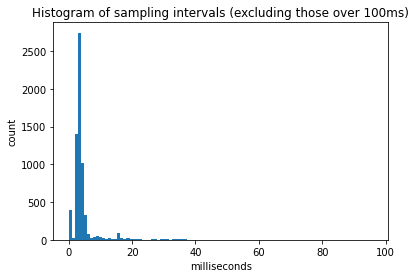

8 values excluding for being over 100ms


In [116]:
plt.hist(np.diff(extracted_seconds)[np.diff(extracted_seconds)<0.1]*1000, bins=100)
plt.xlabel('milliseconds')
plt.ylabel('count')
plt.title('Histogram of sampling intervals (excluding those over 100ms)')
plt.show()
print('{} values excluding for being over 100ms'.format(int(len(np.diff(extracted_seconds)) - len(np.diff(extracted_seconds)[np.diff(extracted_seconds)<0.1])  )))

In [42]:
np.max(np.diff(extracted_seconds)*1000)

17885.121

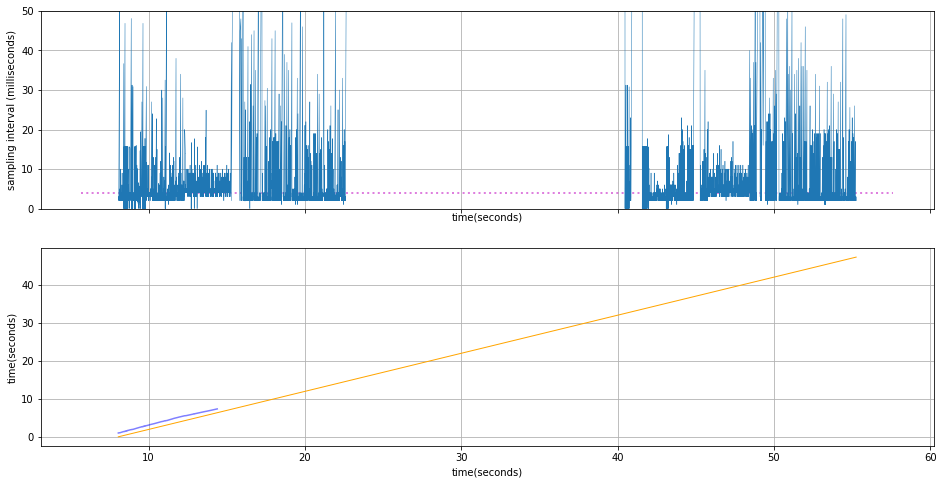

s = 1
e = 1500
blue segment sampling rate = 236.62134397134903
total duration modeled = 6.335016000000001


In [121]:
fig, (ax, ax2) = plt.subplots(2,1,figsize=(16,8), sharex=True)
#plt.yscale('log')
ax.plot(extracted_seconds[1:], np.diff(extracted_seconds)*1000, lw=0.5)


#ax.set_xlim(9,10)
ax.set_ylim(0,50)
ax.hlines(1000/256, *ax.get_xlim(), lw=2, alpha=0.5, ls='dotted', color='m')
ax.grid()
ax.set_xlabel('time(seconds)')
ax.set_ylabel('sampling interval (milliseconds)')

ax2.plot(extracted_seconds[1:], np.cumsum(np.diff(extracted_seconds)), lw=1, color='orange')
#ax2.scatter(extracted_seconds[1:], np.cumsum(np.diff(extracted_seconds)), s=4, alpha=0.5)
s=1
e=1500   #int(len(extracted_seconds[:-1])/2)
offset_y = 1
#ax2.scatter(extracted_seconds[s:e], offset_y+np.cumsum(np.diff(extracted_seconds[s-1:e])), s=4, alpha=0.2, color='green')
ax2.plot(extracted_seconds[s:e], offset_y+range(len(extracted_seconds[s:e]))/(len(extracted_seconds[s:e])/(extracted_seconds[e]-extracted_seconds[s])), color='b', alpha=0.5)

ax2.set_xlabel('time(seconds)')
ax2.set_ylabel('time(seconds)')
#ax2.set_ylim(1,2.5)
ax2.grid()
plt.show()

print('s =',s)
print('e =',e)
print('blue segment sampling rate =', (len(extracted_seconds[s:e])/(extracted_seconds[e]-extracted_seconds[s])))
print('total duration modeled =', extracted_seconds[e]-extracted_seconds[s])

In [100]:
1000/(80*4)

3.125

# Try code I used for Neurable audition on this EEG data
(I might have to interpolate to even out the time series)

In [127]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import seaborn as sns

from sklearn.decomposition import FastICA
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import dendrogram

# helper functions

# Complex morlet wavelets (cmw) consist of a sine wave multiplied by a Gaussian. 
# (The imaginary term comes from Euler's formula.)
cmw = lambda t, f, s: (1/np.sqrt(s*np.sqrt(np.pi))) * np.exp(-t**2/(2*s**2)) * np.exp(1j*2*np.pi*f*t)
# Where t is time axis, f is peak frequency of wavelet, and s is standard deviation of Gaussian (std_for_gaussian)
std_for_gaussian = lambda n, f: n/(2*np.pi*f)
# Where f is peak frequency of wavelet and n is number of wavelet cycles

# Although not used in this notebook, this visualize_wavelet function can be helpful for understanding.
def visualize_wavelet(freq=6, n_wavelet_cycles=6, windowLengthSeconds=1, fs=300):
    x = np.linspace(-windowLengthSeconds/2, windowLengthSeconds/2, int(windowLengthSeconds*fs)+1)  # 300 Hz sampling rate
    complex_morlet_wavelet = cmw(x, freq, std_for_gaussian(n=n_wavelet_cycles, f=freq))

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, np.real(complex_morlet_wavelet), np.imag(complex_morlet_wavelet))
    ax.set_xlabel('time(s)')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    plt.show()

    fig = plt.figure()  # real component is centered at time=0 (like a cosine function)
    ax = fig.gca(projection='3d')
    ax.plot(x, np.real(complex_morlet_wavelet), np.imag(complex_morlet_wavelet))
    ax.view_init(90, -90)
    ax.set_xlabel('time(s)')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    plt.show()

    fig = plt.figure()   # imaginary component is phase-shifted by 90 degrees (like a sine function)
    ax = fig.gca(projection='3d')
    ax.plot(x, np.real(complex_morlet_wavelet), np.imag(complex_morlet_wavelet))
    ax.view_init(0, -90)
    ax.set_xlabel('time(s)')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    plt.show()

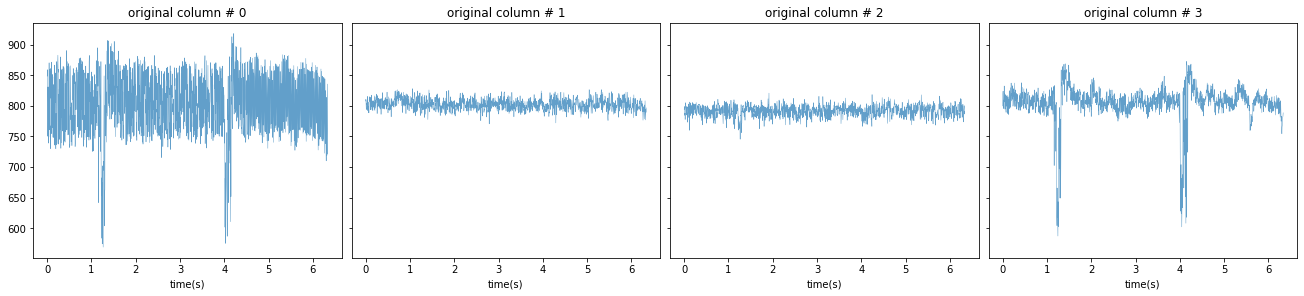

In [150]:
s_ = 0
e_ = 1500
fs = 236.62134397134903
num_columns = 4
duration_of_input = extracted_seconds[e]-extracted_seconds[s]

# Load data
plot_things=True  # Make this False to accelerate runtime

#data_single_path = 'data1_single\\data1_single.csv'
#data_full_path = 'data2_full\\data2_full.csv'

time0 = time()
# Load data and give times assuming 300Hz sampling rate
df_full = df1_sorted.iloc[:1500, :4]
time_axis = np.linspace(0, len(df_full)/fs, len(df_full), endpoint=False) 
df_full.index = time_axis

if plot_things==True:
    fig, axes = plt.subplots(1,num_columns, figsize=(18,4), constrained_layout=True, sharey=True, sharex=True)
    for i, ax in enumerate(axes.flatten()):
        if i < num_columns:
            ax.plot(df_full.index, df_full.iloc[:,i], lw=0.5, alpha=0.7)
            ax.set_xlabel('time(s)')
            #ax.set_ylim(-150,150)
            ax.set_title('original column # '+str(i))
    plt.show()

Blind source separation complete
Finding outliers with multidimensional EllipticEnvelope.
Rejecting dimensions where outliers have high variance. [var(outliers) > 4*var(inliers)]
1 sources rejected : [1]


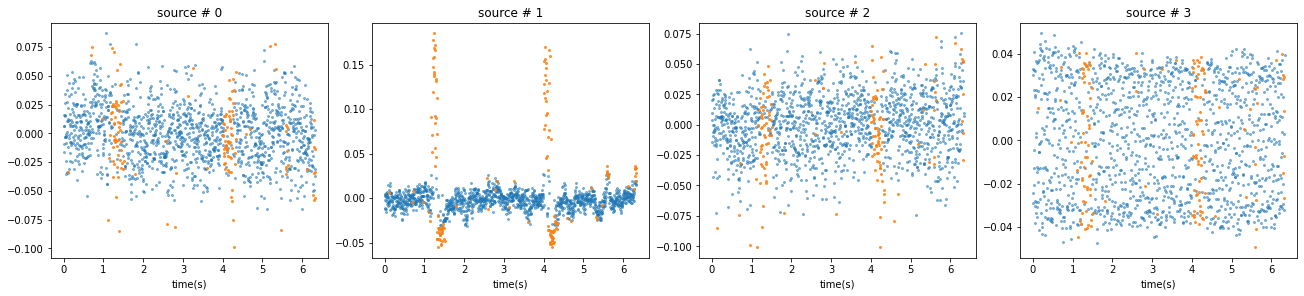

In [138]:
# Blind source separation 
# Failure to converge can be fixed by increasing max_iter and tol arguments, but results will be the same.
ica = FastICA(n_components=len(df_full.columns)) # , max_iter=500, tol=6e-3  # , random_state=0
ica_sources = ica.fit_transform(df_full.values)
print("Blind source separation complete")

# Identify outliers and reject problematic noise sources
print('Finding outliers with multidimensional EllipticEnvelope.')
outlier_labels = EllipticEnvelope().fit_predict(ica_sources)  # find outliers
inlier_mask = outlier_labels==1

# Reject sources where the set of all outliers have at least 4 times more variance than the set of all inliers
print('Rejecting dimensions where outliers have high variance. [var(outliers) > 4*var(inliers)]')
reject_source_list = [i for i in range(num_columns) if np.var(ica_sources[:,i][~inlier_mask]) / np.var(ica_sources[:,i][inlier_mask]) > 4]
print('{} sources rejected :'.format(len(reject_source_list)), reject_source_list)

if plot_things==True:
    fig, axes = plt.subplots(1,num_columns, figsize=(18,4), constrained_layout=True)
    for i, ax in enumerate(axes.flatten()):
        if i < num_columns:
            ax.scatter(df_full.index[inlier_mask], ica_sources[:,i][inlier_mask], s=4, alpha=0.5)
            ax.scatter(df_full.index[~inlier_mask], ica_sources[:,i][~inlier_mask], s=4, alpha=0.8)        
            ax.set_xlabel('time(s)')
            ax.set_title('source # '+str(i))
    plt.show()

Remixing without rejected sources


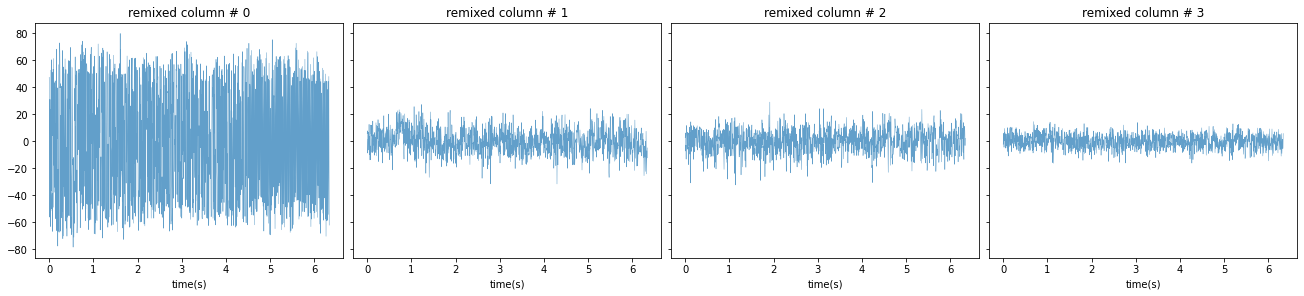

In [139]:
print('Remixing without rejected sources')

# Remix channels without problematic sources
keep_components = [i for i in range(num_columns) if i not in reject_source_list]
remixed_full = np.dot(ica.mixing_[:,keep_components], ica_sources.T[keep_components,:]).T

if plot_things==True:
    # Test everything so far
    fig, axes = plt.subplots(1,num_columns, figsize=(18,4), constrained_layout=True, sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        if i < num_columns:
            ax.plot(df_full.index, remixed_full[:,i], lw=0.5, alpha=0.7)
            ax.set_xlabel('time(s)')
            #ax.set_ylim(-150,150)
            ax.set_title('remixed column # '+str(i))
    plt.show()

In [145]:
def apply_wavelets(freqs, data, n_wavelet_cycles, fs, extract_list=['power'], num_EEG_channels=4, plot_things=False, verbose=False):
    # Ensure n_wavelet_cycles is coherent with freqs (Either int/float or sequence with length matching len(freqs))
    if type(n_wavelet_cycles)==int or type(n_wavelet_cycles)==float:
        n_wavelet_cycles = [n_wavelet_cycles] * len(freqs)
    else:
        assert len(n_wavelet_cycles) == len(freqs), 'Error: If n_wavelet_cycles is a sequence, it must match length of freqs.'
    
    std_for_gaussian = lambda n, f: n/(2*np.pi*f)
    cmw = lambda t, f, s: (1/np.sqrt(s*np.sqrt(np.pi))) * np.exp(-t**2/(2*s**2)) * np.exp(1j*2*np.pi*f*t)
    
    outer_list = []
    
    for freq, n_cycles in zip(freqs, n_wavelet_cycles): # iterate over each peak frequency
        inner_dict = dict()
        windowLengthSeconds=1
        t = np.linspace(-windowLengthSeconds/2, windowLengthSeconds/2, int(windowLengthSeconds*fs)+1)  # 300 Hz sampling rate
        complex_morlet_wavelet = cmw(t, freq, std_for_gaussian(n=n_cycles, f=freq))
        
        if plot_things==True:
            visualize_wavelet(freq, n_wavelet_cycles=n_cycles, windowLengthSeconds=windowLengthSeconds, fs=fs)
        
        for i in range(num_EEG_channels):   # iterate over each channel
            complex_convolved = np.convolve(complex_morlet_wavelet, data[:,i], mode='same')
            
            inner_dict['bandpass_'+str(i)] = np.real(complex_convolved)  
            inner_dict['amplitude_'+str(i)] = np.abs(complex_convolved)
            inner_dict['power_'+str(i)] = np.abs(complex_convolved**2)
            inner_dict['phase_'+str(i)] = np.angle(complex_convolved)

        outer_list.append(inner_dict)

        if verbose==True: 
            print(inner_dict.keys())

    new_df=pd.DataFrame({extraction+str(np.round(freq,1))+'HzCh'+str(i) : outer_item[extraction+'_'+str(i)] for extraction in extract_list for i in range(num_EEG_channels) for freq, outer_item in zip(freqs, outer_list)})
    return new_df   

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


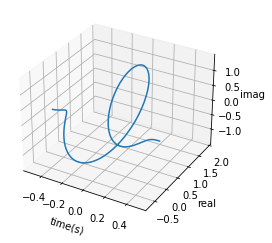

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


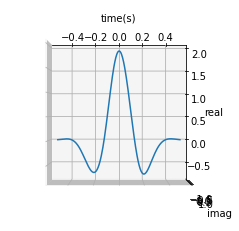

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


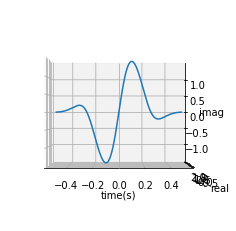

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


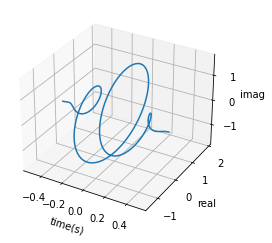

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


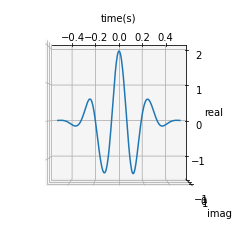

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


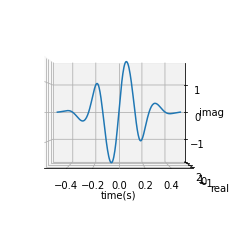

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


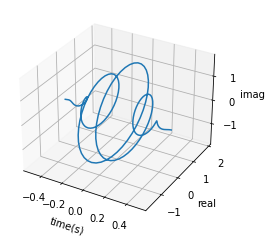

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


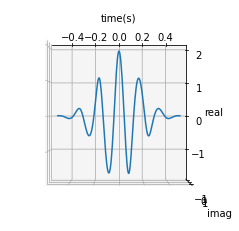

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


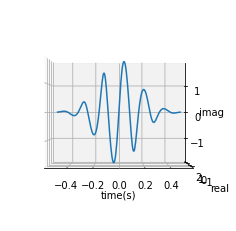

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


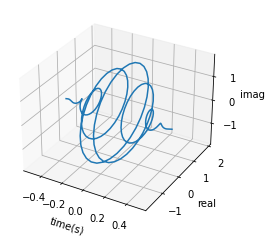

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


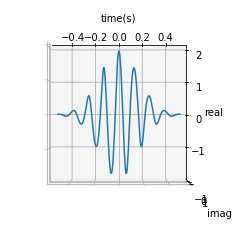

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


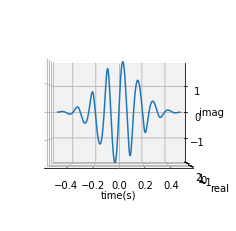

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


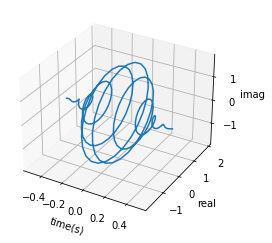

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


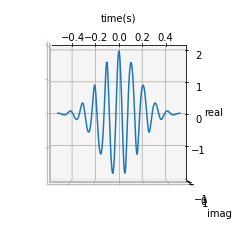

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


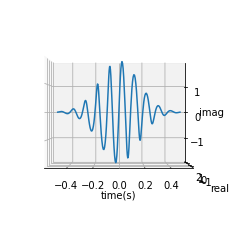

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


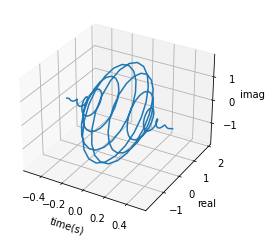

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


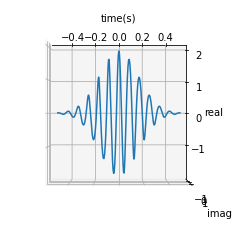

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


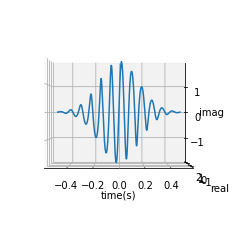

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


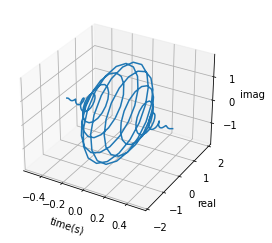

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


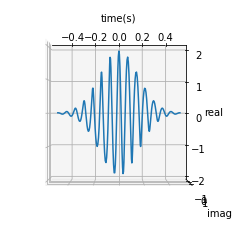

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


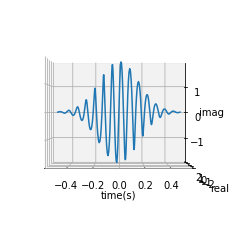

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


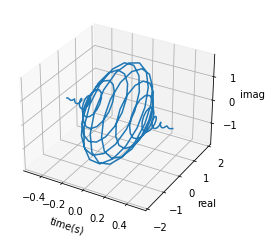

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


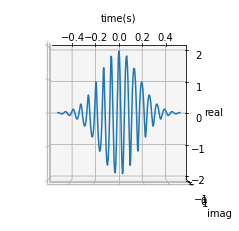

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


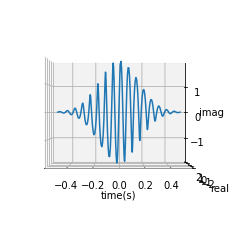

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


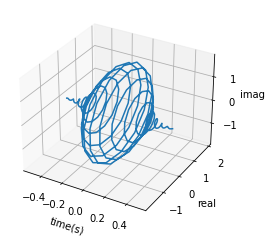

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


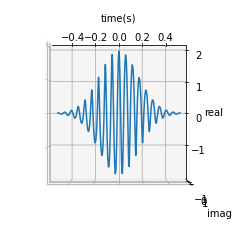

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


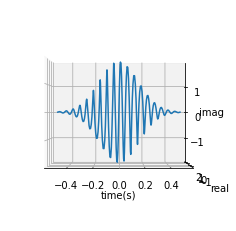

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


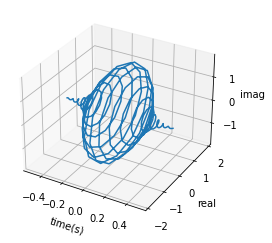

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


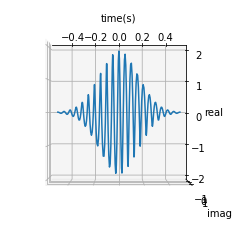

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


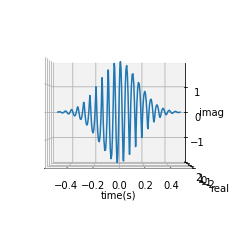

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


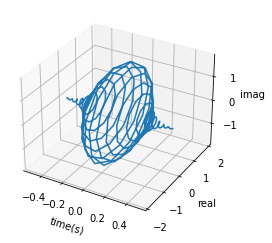

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


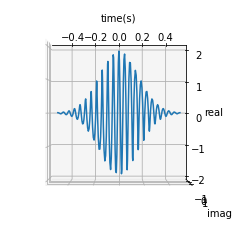

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


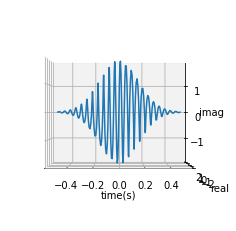

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


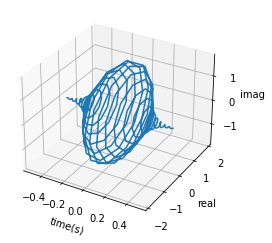

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


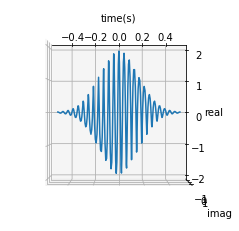

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


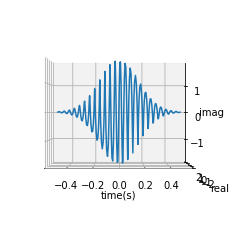

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


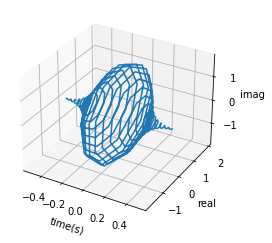

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


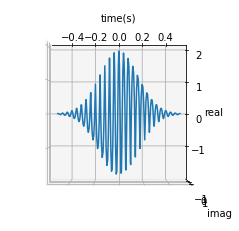

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


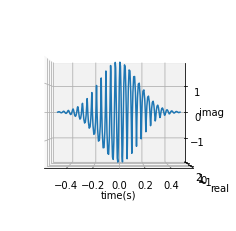

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


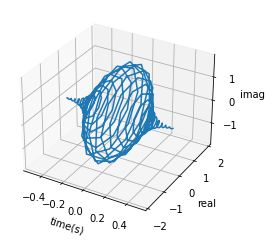

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


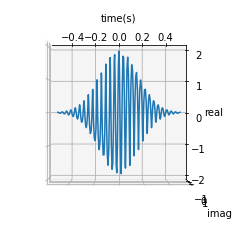

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


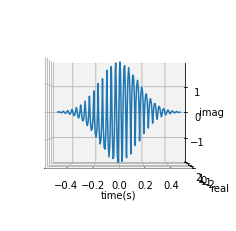

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


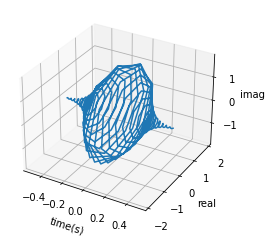

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


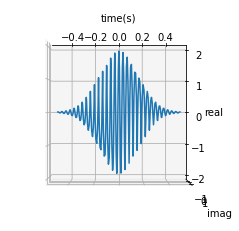

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


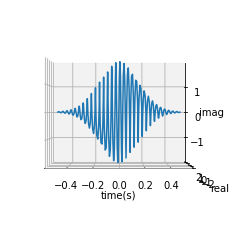

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


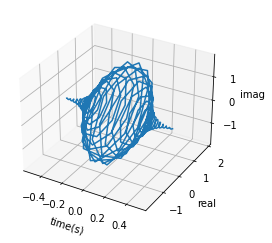

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


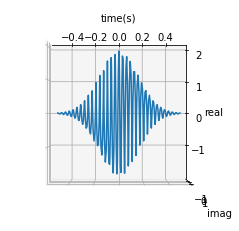

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


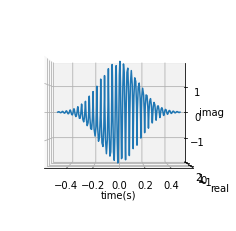

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


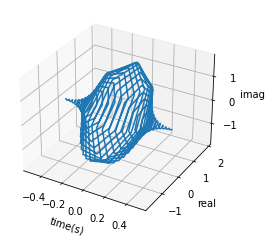

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


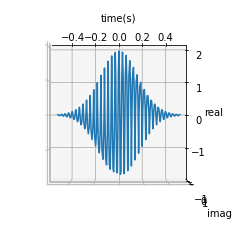

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


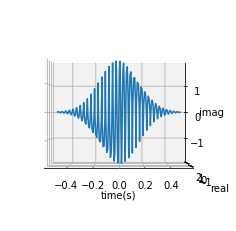

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


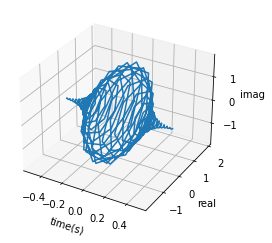

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


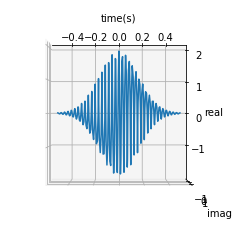

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


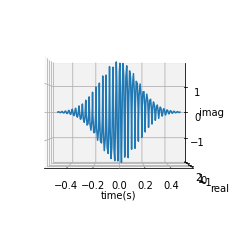

<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


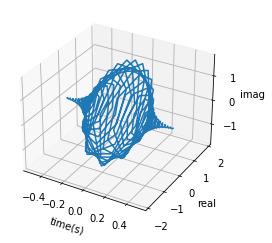

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


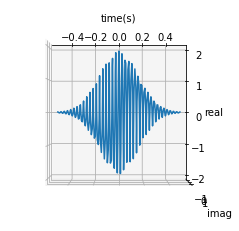

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


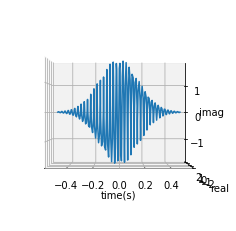

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])


<ipython-input-127-9710f209f97b>:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


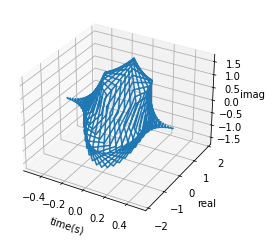

<ipython-input-127-9710f209f97b>:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


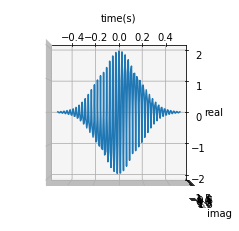

<ipython-input-127-9710f209f97b>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


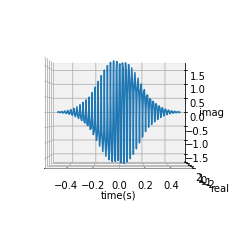

dict_keys(['bandpass_0', 'amplitude_0', 'power_0', 'phase_0', 'bandpass_1', 'amplitude_1', 'power_1', 'phase_1', 'bandpass_2', 'amplitude_2', 'power_2', 'phase_2', 'bandpass_3', 'amplitude_3', 'power_3', 'phase_3'])
Power extract runtime = 16.1 seconds


In [146]:
time0 = time()
# 78 wavelets with peak frequency of 2Hz, 3Hz,..., 79Hz with n_cycles of 2, 3, ..., 79.
wavelet_output = apply_wavelets(np.linspace(2,40,20), data=remixed_full, n_wavelet_cycles=np.linspace(2,40,20), fs=fs, extract_list=['power'], plot_things=True, verbose=True)      

print('Power extract runtime = {} seconds'.format(np.round(time()-time0, 1)))

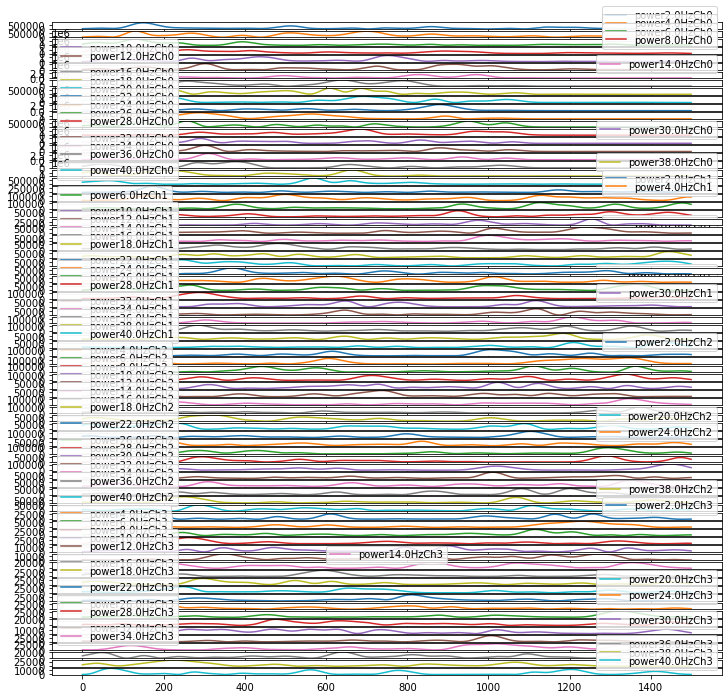

Plot power runtime = 18.4 seconds


In [149]:
# This visualization cell takes way too long to run.

time0 = time()

wavelet_output.plot(subplots=True, figsize=(12,12))
plt.show()

print('Plot power runtime = {} seconds'.format(np.round(time()-time0, 1)))

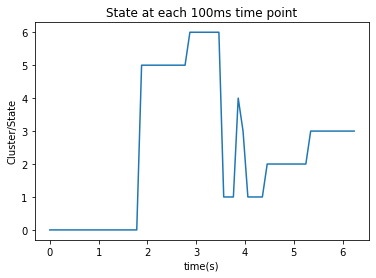

In [155]:
wavelet_output_dB = 10 * np.log10(wavelet_output)
# I downsampled at first, but downsampling seems to have no effect in this procedure.
wavelet_output_dB.index = pd.to_timedelta(np.linspace(0,len(wavelet_output_dB)/fs,len(wavelet_output_dB), endpoint=False), unit='s')
wavelet_output_dB_ds = wavelet_output_dB.resample('100ms').agg(['mean'])        #agg(agg_Hjorth_funcs)   #

#print(wavelet_output_dB_ds.head())
#print(wavelet_output_dB_ds.info())

tsne = TSNE(perplexity=5, init='pca')
transformed_dB = TSNE.fit_transform(tsne, X=StandardScaler().fit_transform(wavelet_output_dB_ds.values))

cluster_algo = AgglomerativeClustering(n_clusters=None, distance_threshold=300)     #MeanShift() # #
cluster_labels = cluster_algo.fit_predict(transformed_dB)
plt.plot(np.linspace(0, duration_of_input, len(cluster_labels), endpoint=False), cluster_labels)
plt.xlabel('time(s)')
plt.ylabel('Cluster/State')
plt.title('State at each 100ms time point')
plt.show()

avg_silhouette_score 0.4232934
(64,)


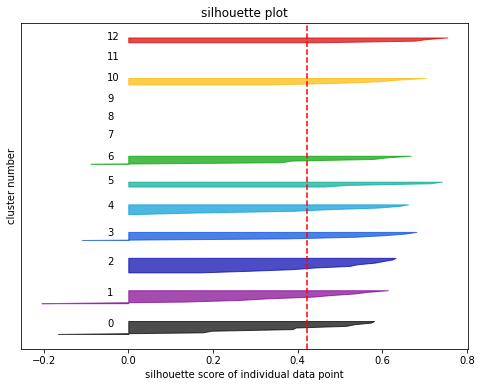

In [152]:
# Code adapted from scikit-learn website

# Silhouette score analysis (Looking for silhouette score > 0.25, preferably > 0.5)
   
x_cols = transformed_dB

avg_silhouette_score = silhouette_score(x_cols, cluster_labels)
individual_silhouette_scores = silhouette_samples(x_cols, cluster_labels)
print('avg_silhouette_score', avg_silhouette_score)
print(individual_silhouette_scores.shape)

y_lower = 10  # Give a cluster-specific baseline per subset

k = len(np.unique(cluster_labels))

fig, ax0 = plt.subplots(1, 1, figsize=[8,6])

for i in range(k):
    subset_sil_scores = individual_silhouette_scores[cluster_labels == i]
    subset_sil_scores.sort()

    size_of_subset = subset_sil_scores.shape[0]

    y_upper = y_lower + size_of_subset

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper), 0, subset_sil_scores, facecolor=color, edgecolor=color, alpha=0.7)
    ax0.text(-0.05, y_lower + 0.5 * size_of_subset, str(i))

    y_lower = y_upper + 10   # Compute new y_lower for next cluster baseline

ax0.set_xlabel('silhouette score of individual data point')
ax0.set_ylabel('cluster number')
ax0.set_title('silhouette plot')

ax0.axvline(x=avg_silhouette_score, color="r", linestyle="--")
ax0.set_yticks([])  # Clear the yaxis labels / ticks
#ax0.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

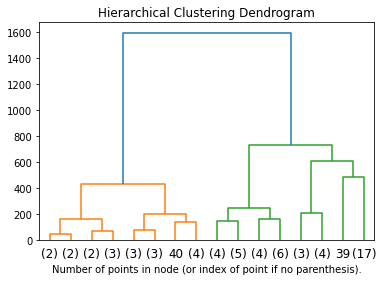

In [156]:
#from scikit-learn website: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(transformed_dB)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

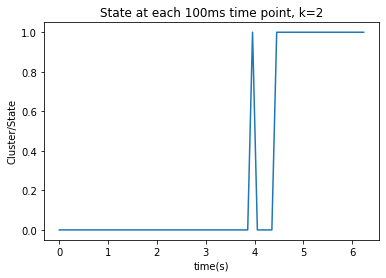

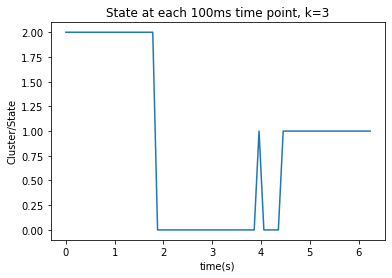

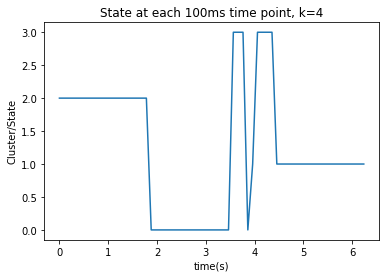

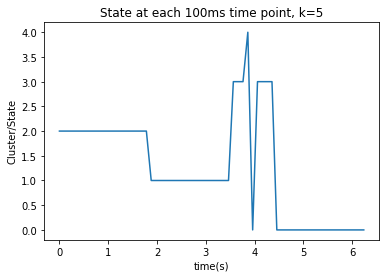

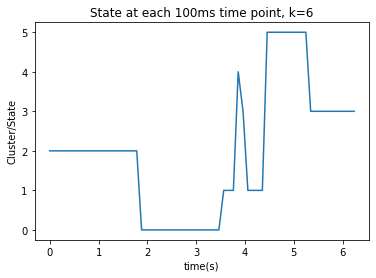

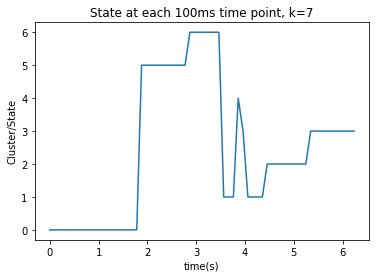

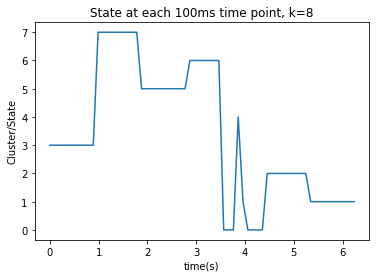

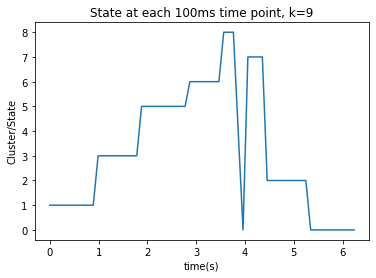

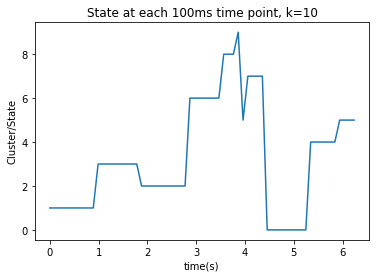

In [157]:
for k in range(2, 11):
    cluster_algo = AgglomerativeClustering(n_clusters=k)     #MeanShift() # #
    cluster_labels = cluster_algo.fit_predict(transformed_dB)
    plt.plot(np.linspace(0, duration_of_input, len(cluster_labels), endpoint=False), cluster_labels)
    plt.xlabel('time(s)')
    plt.ylabel('Cluster/State')
    plt.title('State at each 100ms time point, k={}'.format(k))
    plt.show()

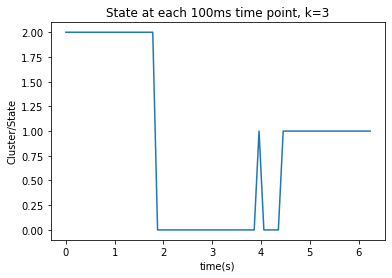

In [160]:
k=3
cluster_algo = AgglomerativeClustering(n_clusters=k)     #MeanShift() # #
cluster_labels = cluster_algo.fit_predict(transformed_dB)
plt.plot(np.linspace(0, duration_of_input, len(cluster_labels), endpoint=False), cluster_labels)
plt.xlabel('time(s)')
plt.ylabel('Cluster/State')
plt.title('State at each 100ms time point, k={}'.format(k))
plt.show()

In [162]:
times_states = [(np.round(t,1), state) for t, state in zip(np.linspace(0,duration_of_input,len(cluster_labels),endpoint=False), cluster_labels)]
#times_states
state_changes = [times_states[0]]
state_changes.extend([times_states[i] for i in range(1, len(times_states)) if times_states[i][1] - times_states[i-1][1] != 0])
print('(time, state_number):\n')
print(state_changes)

(time, state_number):

[(0.0, 2), (1.9, 0), (4.0, 1), (4.1, 0), (4.5, 1)]
